In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import mnist  # For importing the MNIST dataset
from keras import utils  # For various utility functions
from keras.datasets import mnist


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the MNIST dataset, which is a dataset of handwritten digits
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Display the shape of the y_test array
print(y_test.shape)

(10000,)


In [ ]:
# Display the shape of the x_train array
print(x_train.shape)

(60000, 28, 28)


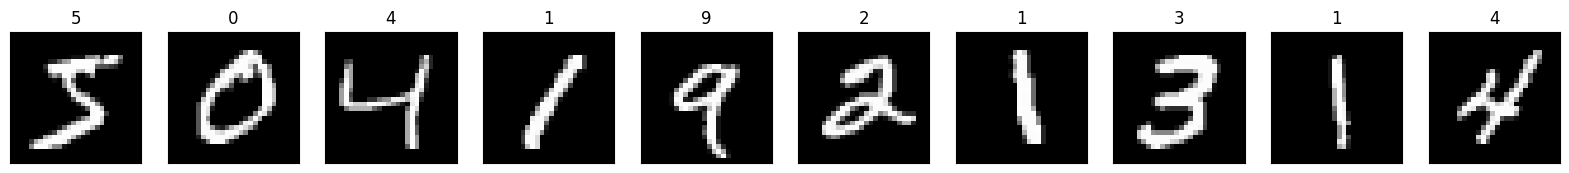

In [ ]:
#first 10 images from the training dataset
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 5))
for i in range(10):

    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [ ]:
#convert the labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Let's check the shape of the y_test array
print(y_test.shape)

(10000, 10)


In [ ]:
# Define a Sequential model
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(10, activation='sigmoid'))

model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

In [ ]:
#model summery
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


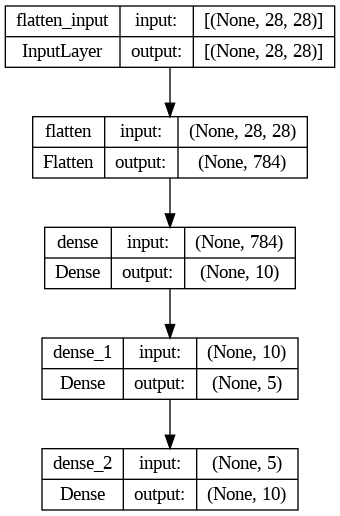

In [ ]:
# Plot the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
#Fit the model with 20 epochs
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7750 - acc: 0.3996 - val_loss: 1.4493 - val_acc: 0.5087
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2779 - acc: 0.5587 - val_loss: 1.1571 - val_acc: 0.5954
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1144 - acc: 0.6022 - val_loss: 1.0685 - val_acc: 0.6295
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0263 - acc: 0.6520 - val_loss: 0.9281 - val_acc: 0.7145
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9202 - acc: 0.7239 - val_loss: 0.8423 - val_acc: 0.7560
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8295 - acc: 0.7649 - val_loss: 0.7487 - val_acc: 0.7964
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7508 - acc: 0.7926 - val_loss: 0.6848 - val_acc: 0.8195
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

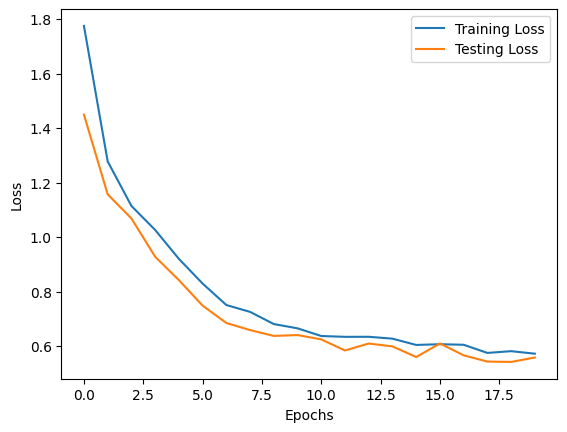

In [ ]:
#Plot Training and Testing Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Save the model in .h5 extension
model.save('mnist_model.h5')


In [ ]:
#Load the model
from keras.models import load_model
loaded_model = load_model('mnist_model.h5')


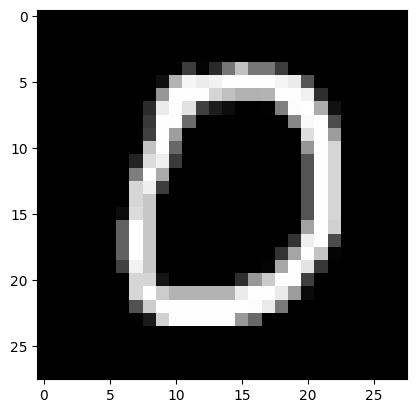

In [ ]:
# Displaying the first test image from the dataset
plt.imshow(x_test[10], cmap='gray')

In [ ]:
import numpy as np
x = np.reshape(x_test[101], (1, 28, 28))
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 [==============================] - 0s 310ms/step
0
